<a href="https://colab.research.google.com/github/varshith192/AIML-lab/blob/main/lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import fetch_openml
car_data = fetch_openml(name = 'car' ,version=2 ,parser='auto')

In [ ]:
type(car_data)

sklearn.utils._bunch.Bunch

In [ ]:
car_data.details('version')

TypeError: 'list' object is not callable

In [ ]:
car_data.details

{'id': '991',
 'name': 'car',
 'version': '2',
 'description_version': '1',
 'format': 'ARFF',
 'upload_date': '2014-10-04T22:44:31',
 'licence': 'Public',
 'url': 'https://api.openml.org/data/v1/download/53525/car.arff',
 'parquet_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'file_id': '53525',
 'default_target_attribute': 'binaryClass',
 'tag': ['Chemistry',
  'derived',
  'Life Science',
  'mythbusting_1',
  'study_1',
  'study_15',
  'study_20',
  'study_41',
  'study_7'],
 'visibility': 'public',
 'minio_url': 'https://openml1.win.tue.nl/datasets/0000/0991/dataset_991.pq',
 'status': 'active',
 'processing_date': '2020-11-20 20:17:54',
 'md5_checksum': '49c57b793eef1b8e55f297e5e019fdbf'}

In [ ]:
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [ ]:
car_data=car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data=train_test_split(car_data,test_size=0.3,random_state=20)
print('the size of training data is:{}\n the size of testing data is:{}'.format(len(train_data),len(test_data)))

the size of training data is:1209
 the size of testing data is:519


In [ ]:
train_data['maint'].value_counts()

high     311
med      311
vhigh    294
low      293
Name: maint, dtype: int64

In [ ]:
train_data['doors'].value_counts()

5more    319
2        312
4        296
3        282
Name: doors, dtype: int64

In [ ]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

In [ ]:
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1209,1209,1209,1209,1209,1209,1209
unique,4,4,4,3,3,3,2
top,med,high,5more,more,big,med,P
freq,327,311,319,418,411,406,849


In [ ]:
train_data['persons'].value_counts()

more    418
2       407
4       384
Name: persons, dtype: int64

<Axes: xlabel='buying', ylabel='count'>

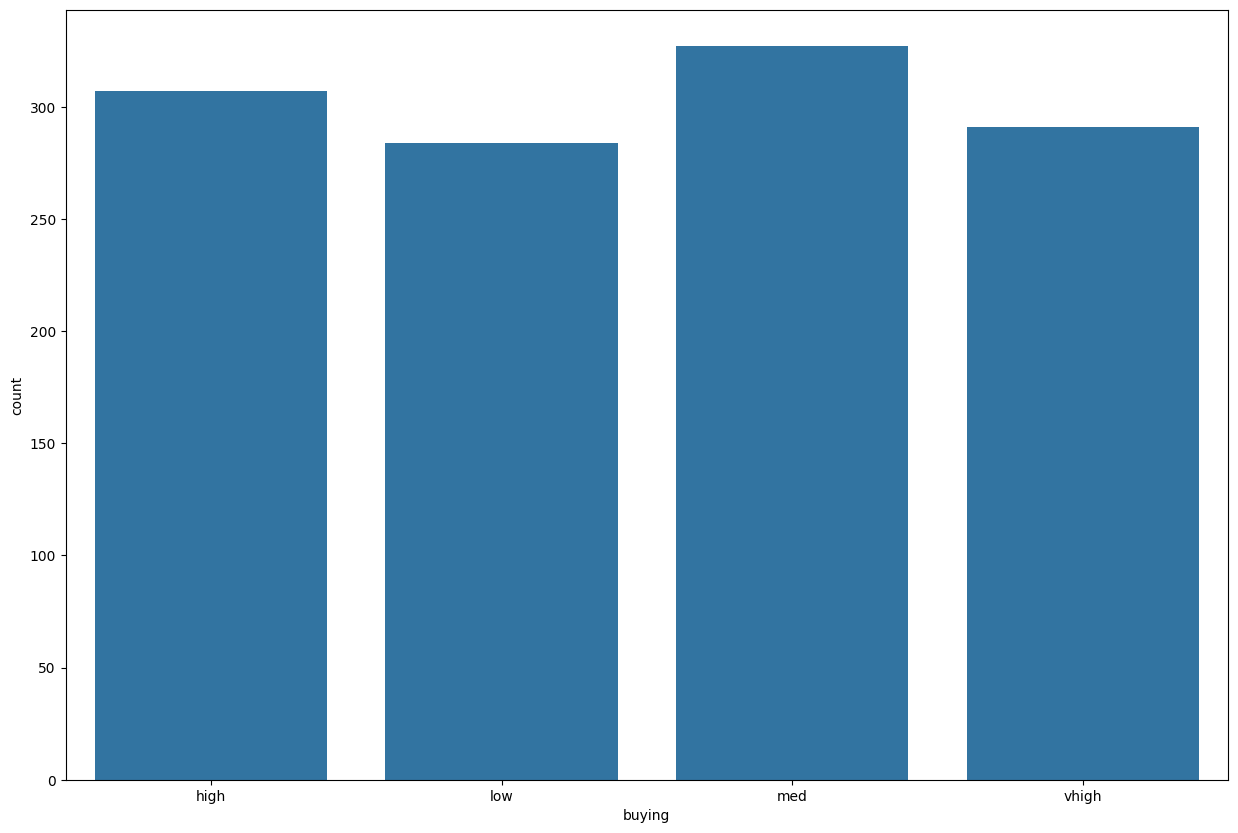

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data,x='buying')

<Axes: xlabel='buying', ylabel='count'>

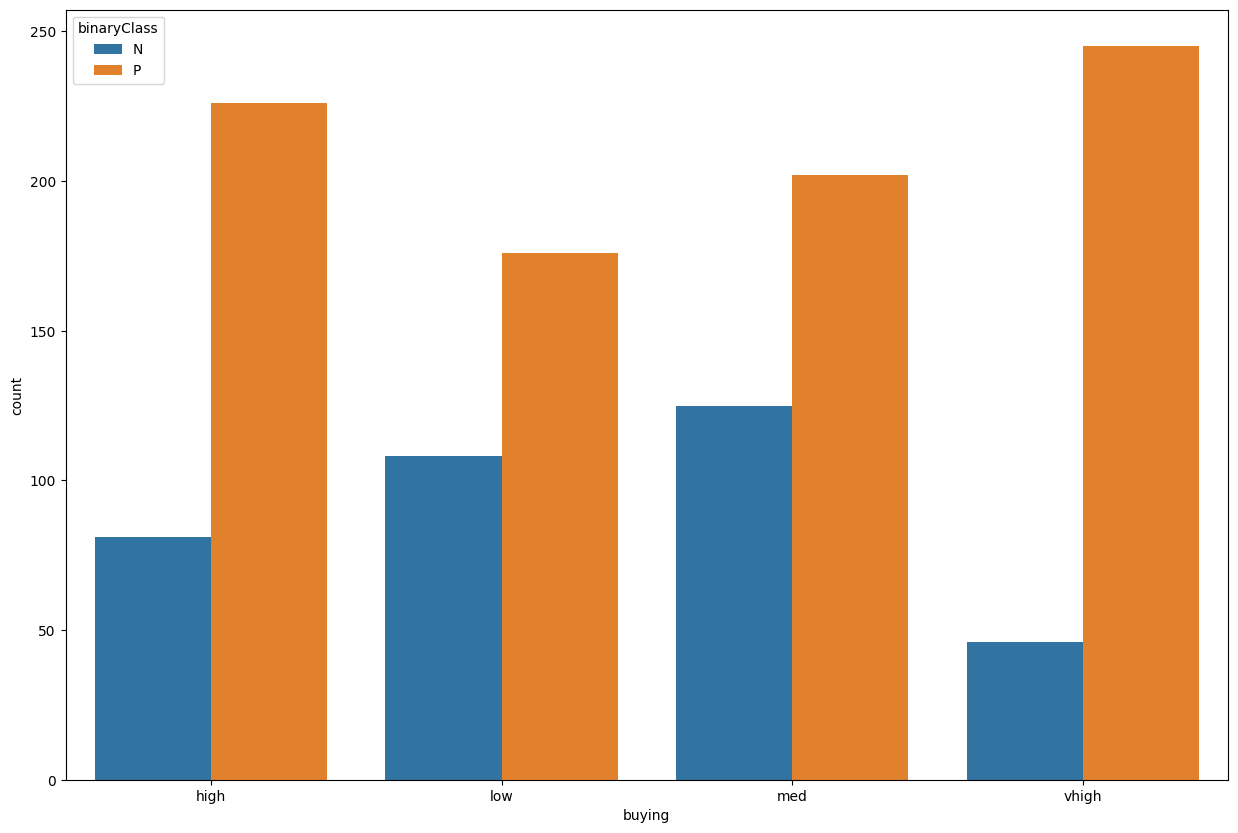

In [ ]:
plt.figure(figsize=(15,10))
sns.countplot(data=train_data, x='buying',hue='binaryClass')

In [ ]:
train_data['binaryClass'].value_counts()


P    849
N    360
Name: binaryClass, dtype: int64

In [ ]:
car_train=train_data.drop('binaryClass',axis=1)
car_tables=train_data[['binaryClass']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
pipe=pipeline([('ord_enc',OrdinalEncoder())])
car_train_prepared